In [1]:
import pandas as pd
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim_models as gensimvis  
from gensim.models.ldamulticore import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 
import matplotlib.gridspec as gridspec
import math

/Users/conneryurkon/miniconda3/envs/cs8803dsn/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df = pd.read_excel('final_cleaned_data.xlsx', index_col=0)
df[['C1', 'C2', 'C3']] = df[['C1', 'C2', 'C3']].astype(str)
df.head()

,C1,C2,C3,A1,A2,A3,ID,Link,C1_link,C2_link,C3_link
0,>anti-punctuationwhy should i care about punct...,Ah… I get it now. You’re still too young… have...,i have two PhDs dumb ass,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN
1,Ah… I get it now. You’re still too young… have...,i have two PhDs dumb ass,One in Anti-punctuation; the other in Palindro...,DedsecEric,killer0214,DedsecEric,wtjgdk,0,NaN,NaN,NaN
2,i have two PhDs dumb ass,One in Anti-punctuation; the other in Palindro...,no biology and chemistry,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN
3,One in Anti-punctuation; the other in Palindro...,no biology and chemistry,"Apparently, no English either.",DedsecEric,killer0214,DedsecEric,wtjgdk,0,NaN,NaN,NaN
4,no biology and chemistry,"Apparently, no English either.",im working on one in psychology and English,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN


In [3]:
df.shape

(12739, 11)

In [4]:
df['agg'] = df[['C1', 'C2', 'C3']].agg(' '.join, axis=1)
df['agg'].iloc[2]

'i have two PhDs dumb ass One in Anti-punctuation; the other in Palindromes? We’ll call you Dr. Awkward. no biology and chemistry'

In [5]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/conneryurkon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['agg'] = df['agg'].apply(simple_preprocess)
df['agg'] = df['agg'].apply(lambda x: [word for word in x if word not in stopwords])
df['agg'].iloc[0]

['anti',
 'punctuationwhy',
 'care',
 'punctuation',
 'internet',
 'one',
 'cares',
 'care',
 'fucking',
 'school',
 'ah',
 'get',
 'still',
 'young',
 'period',
 'yet',
 'two',
 'phds',
 'dumb',
 'ass']

In [7]:
dictionary = Dictionary(df['agg'])
dictionary.token2id

{'ah': 0,
 'anti': 1,
 'ass': 2,
 'care': 3,
 'cares': 4,
 'dumb': 5,
 'fucking': 6,
 'get': 7,
 'internet': 8,
 'one': 9,
 'period': 10,
 'phds': 11,
 'punctuation': 12,
 'punctuationwhy': 13,
 'school': 14,
 'still': 15,
 'two': 16,
 'yet': 17,
 'young': 18,
 'awkward': 19,
 'call': 20,
 'dr': 21,
 'palindromes': 22,
 'biology': 23,
 'chemistry': 24,
 'apparently': 25,
 'either': 26,
 'english': 27,
 'im': 28,
 'psychology': 29,
 'working': 30,
 'actually': 31,
 'amount': 32,
 'apart': 33,
 'banner': 34,
 'bruce': 35,
 'bruh': 36,
 'comment': 37,
 'degrees': 38,
 'depending': 39,
 'even': 40,
 'expert': 41,
 'far': 42,
 'fields': 43,
 'going': 44,
 'high': 45,
 'human': 46,
 'insane': 47,
 'level': 48,
 'like': 49,
 'made': 50,
 'mean': 51,
 'much': 52,
 'multiple': 53,
 'offhand': 54,
 'people': 55,
 'phd': 56,
 'plausible': 57,
 'research': 58,
 'specialization': 59,
 'takes': 60,
 'well': 61,
 'bad': 62,
 'brethren': 63,
 'clan': 64,
 'feel': 65,
 'fuck': 66,
 'also': 67,
 'amab':

In [8]:
corpus = [dictionary.doc2bow(text) for text in df['agg']]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1)]

In [9]:
perplexities = []
coherences = []

for num_topics in range(3, 16):
    lda_model = LdaModel(
        corpus=corpus,
        num_topics=num_topics,
        id2word=dictionary
    )
    perplexities.append(lda_model.log_perplexity(corpus))
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherences.append(coherence_model.get_coherence())

Text(0.5, 1.0, 'Number of Topics vs. Coherence Score')

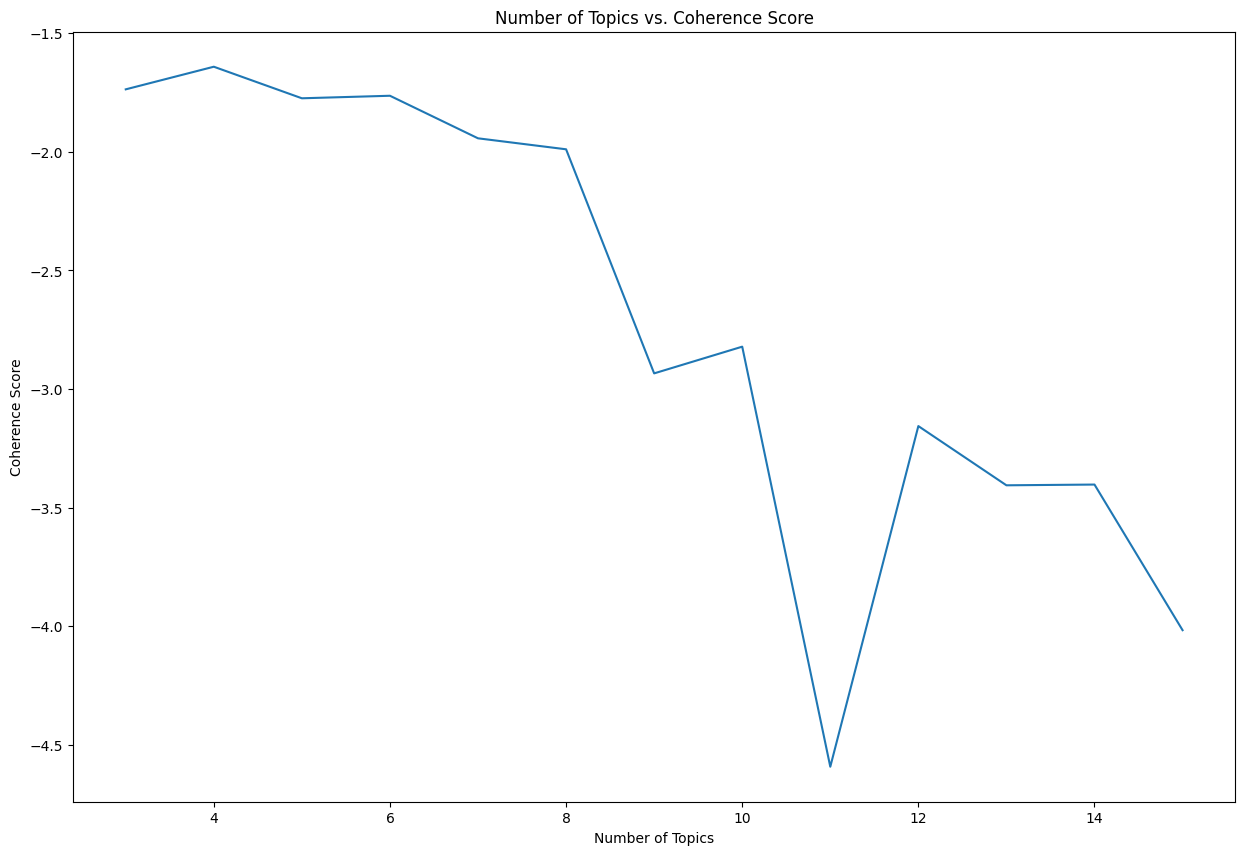

In [10]:
# higher is better

plt.figure(figsize=(15, 10))
plt.plot(range(3, 16), coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Number of Topics vs. Coherence Score")

Text(0.5, 1.0, 'Number of Topics vs. Log Perplexity')

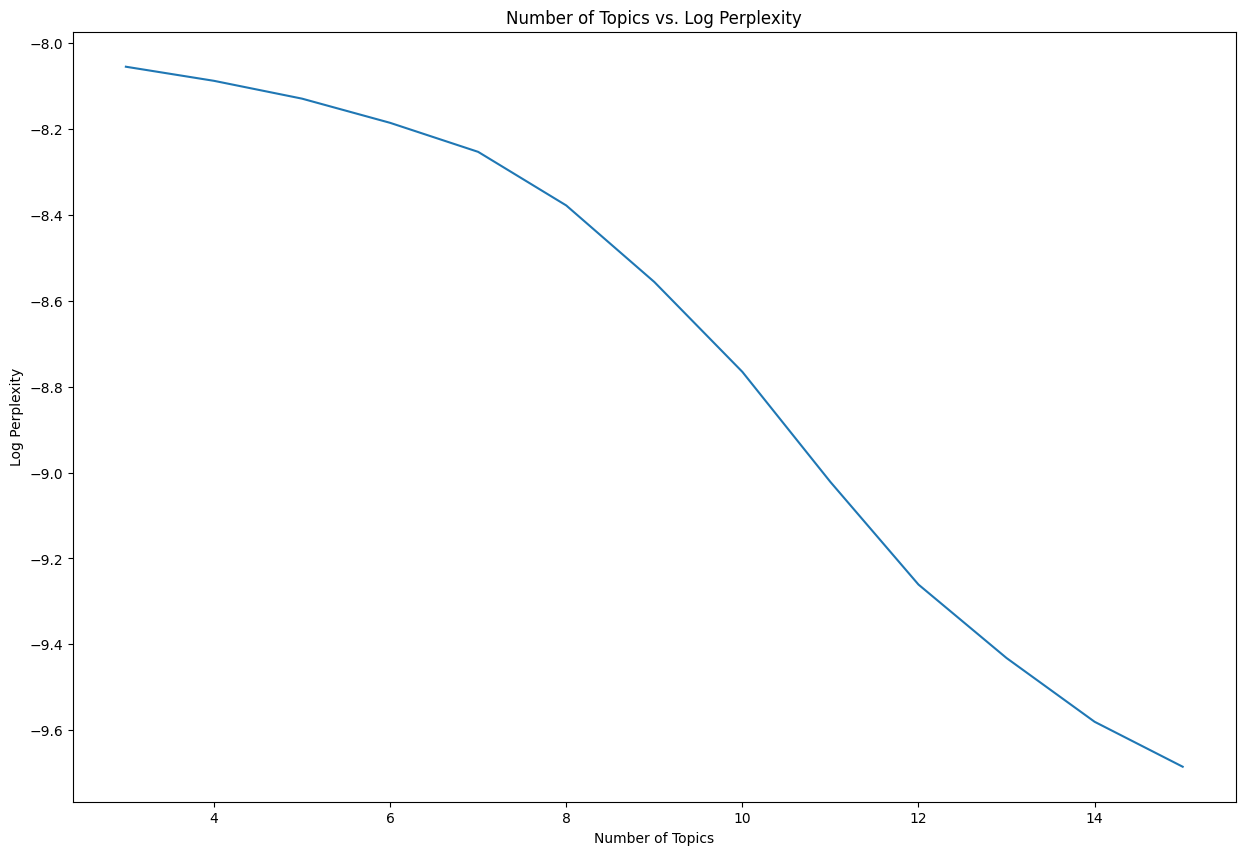

In [11]:
# lower is better

plt.figure(figsize=(15, 10))
plt.plot(range(3, 16), perplexities)
plt.xlabel("Number of Topics")
plt.ylabel("Log Perplexity")
plt.title("Number of Topics vs. Log Perplexity")

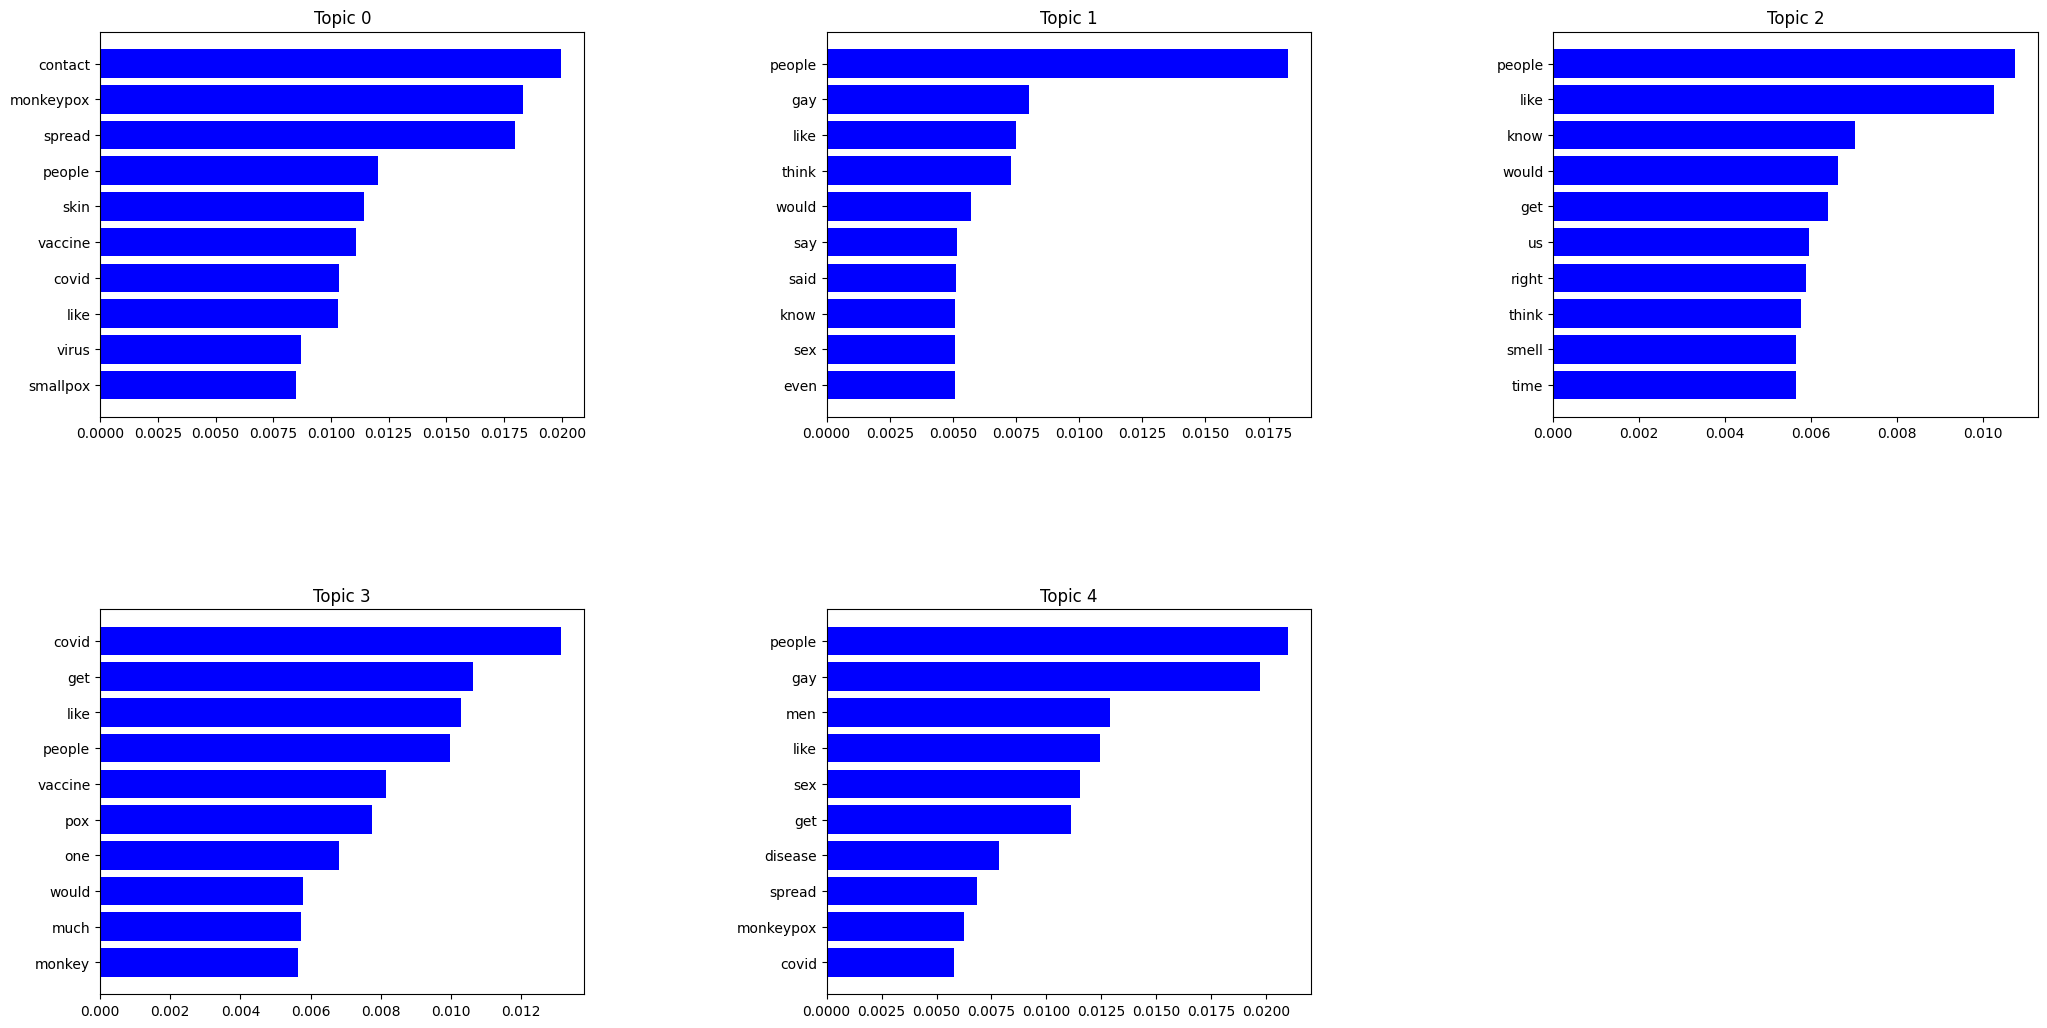

In [16]:
NUM_TOPICS = 5
lda_model = LdaModel(
        corpus=corpus,
        num_topics=NUM_TOPICS,
        id2word=dictionary
)

def plot_top_words(lda=lda_model, nb_topics=NUM_TOPICS, nb_words=10):
    top_words = [[word for word, _ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _, beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(NUM_TOPICS)) + 1, round(math.sqrt(NUM_TOPICS)) + 1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(25, 20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center', color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic " + str(i))
        
plot_top_words(lda=lda_model)

In [17]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/Users/conneryurkon/miniconda3/envs/cs8803dsn/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.055489 -0.044078       1        1  30.187417
0      0.132869  0.044014       2        1  18.628153
1     -0.035398 -0.096367       3        1  17.976393
2     -0.132570  0.043210       4        1  17.693616
3     -0.020389  0.053219       5        1  15.514420, topic_info=           Term         Freq        Total Category  logprob  loglift
1069    contact  3402.000000  3402.000000  Default  30.0000  30.0000
533      spread  3968.000000  3968.000000  Default  29.0000  29.0000
171         gay  5409.000000  5409.000000  Default  28.0000  28.0000
817        skin  1846.000000  1846.000000  Default  27.0000  27.0000
730   monkeypox  4317.000000  4317.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
15        still   337.272820  1762.083167   Topic5  -5.7341   0.2100
1182      media   299.126614  1098.299578   Topic5  -5.8541   0.5627
1026         us   327.336463  2476.243159   Topic5  -5.7640  -0.1601
1204      could   307.783652  1806.728700   Topic5  -5.8256   0.0935
657       thing   299.423958  1629.632590   Topic5  -5.8531   0.1692

[460 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
11142      3  0.954582  abstract
11142      4  0.023865  abstract
12643      1  0.008682      adam
12643      2  0.043408      adam
12643      3  0.040514      adam
...      ...       ...       ...
3383       1  0.019604   youtube
3383       2  0.019604   youtube
3383       3  0.891980   youtube
3383       4  0.068614   youtube
3383       5  0.009802   youtube

[1211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 3, 4])

In [18]:
lda_model.print_topics()

[(0,
  '0.020*"contact" + 0.018*"monkeypox" + 0.018*"spread" + 0.012*"people" + 0.011*"skin" + 0.011*"vaccine" + 0.010*"covid" + 0.010*"like" + 0.009*"virus" + 0.008*"smallpox"'),
 (1,
  '0.018*"people" + 0.008*"gay" + 0.007*"like" + 0.007*"think" + 0.006*"would" + 0.005*"say" + 0.005*"said" + 0.005*"know" + 0.005*"sex" + 0.005*"even"'),
 (2,
  '0.011*"people" + 0.010*"like" + 0.007*"know" + 0.007*"would" + 0.006*"get" + 0.006*"us" + 0.006*"right" + 0.006*"think" + 0.006*"smell" + 0.006*"time"'),
 (3,
  '0.013*"covid" + 0.011*"get" + 0.010*"like" + 0.010*"people" + 0.008*"vaccine" + 0.008*"pox" + 0.007*"one" + 0.006*"would" + 0.006*"much" + 0.006*"monkey"'),
 (4,
  '0.021*"people" + 0.020*"gay" + 0.013*"men" + 0.012*"like" + 0.012*"sex" + 0.011*"get" + 0.008*"disease" + 0.007*"spread" + 0.006*"monkeypox" + 0.006*"covid"')]